In [15]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('savedResults/run_10/allTestLosses.pickle', 'rb') as f:
    losses = pickle.load(f)
print(losses)

[[  0.00000000e+00   1.00000000e-02   2.00000000e-02   3.00000000e-02
    4.00000000e-02   4.00000000e-02   5.00000000e-02   6.00000000e-02
    7.00000000e-02   8.00000000e-02   9.00000000e-02   1.00000000e-01]
 [  2.00000000e+01   5.18411788e-05   5.93475094e-05   3.42279512e-05
    4.42171050e-05   4.42171050e-05   3.64041100e-05   4.31418356e-05
    3.63095990e-05   4.58515033e-05   4.51176876e-05   3.28576679e-05]
 [  3.00000000e+01   1.72584515e-04   9.57829626e-05   6.52020699e-05
    3.75936215e-05   3.75936215e-05   3.78296395e-05   5.42150758e-05
    7.99886666e-05   5.60567271e-05   8.31879143e-05   5.05922774e-05]
 [  4.00000000e+01   1.34957038e-04   1.13711604e-04   7.05248586e-05
    8.05343868e-05   8.05343868e-05   5.55619857e-05   4.61951764e-05
    5.52310485e-05   5.60446110e-05   6.13711481e-05   5.63051223e-05]
 [  5.00000000e+01   5.35292516e-03   2.56765945e-03   7.01926143e-04
    5.54864526e-04   5.54864526e-04   3.70883221e-04   2.95099494e-04
    1.71144415e-

In [2]:
# Only use this for run 1, where the data about the sequence length and weight std was not stored with the losses

# err = np.zeros((len(losses) + 1, len(losses[0]) + 1))

# nPoints = [10,20,30,40,50,60]
# wsd2 = [0.03, 0.06, 0.09, 0.12, 0.15]

# for i in range(len(losses)):
#     err[i+1][0] = nPoints[i]
#     for j in range(len(losses[0])):
#         err[0][j + 1] = wsd2[j]
#         err[i+1][j+1] = losses[i][j]

# print(err)

In [16]:
# 
err = losses

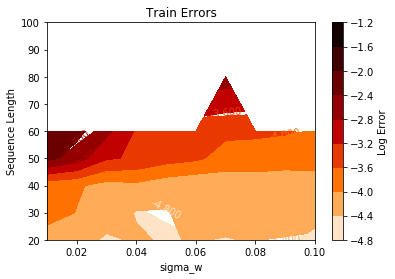

In [17]:
%matplotlib inline

import matplotlib.cm as cm
plt.figure()
cmap = cm.get_cmap('gist_heat_r')
cp = plt.contourf(err[0][1:], err[...,0][1:], np.log10(err[...,1:][1:,...]),
                 cmap = cmap)
plt.colorbar(cp).set_label('Log Error')
plt.clabel(cp, inline=True, fontsize = 10)
plt.title("Train Errors")
plt.xlabel("sigma_w")
plt.ylabel("Sequence Length")

In [18]:
with open('savedResults/run_11/allTestLosses.pickle', 'rb') as f:
    losses = pickle.load(f)
print(losses)

[[  0.00000000e+00   1.00000000e-02   2.00000000e-02   3.00000000e-02
    4.00000000e-02   4.00000000e-02   5.00000000e-02   6.00000000e-02
    7.00000000e-02   8.00000000e-02   9.00000000e-02   1.00000000e-01]
 [  8.00000000e+01   2.23399894e-02   1.99916905e-02   1.39682711e-02
    9.77892998e-03   9.77892998e-03   5.27501706e-03   7.86303591e-03
    5.46630669e-03   3.84853362e-03              nan              nan]
 [  1.00000000e+02   2.53152528e-02   2.38577729e-02   2.21057804e-02
    1.79945814e-02   1.79945814e-02   1.14887671e-02   7.60183214e-03
               nan              nan              nan              nan]]


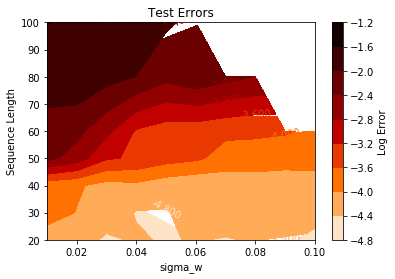

In [20]:
import math
import matplotlib.cm as cm
merged = np.concatenate((err[0:6], losses[1:]), axis=0)
indices = range(len(merged[0]))
indices.sort(key=merged[0].__getitem__)
sorted = np.zeros((len(merged[...,0]), len(merged[0])))
for i in range(len(indices)):
    sorted[...,i] = merged[...,indices[i]]


cmap = cm.get_cmap('gist_heat_r')
cp = plt.contourf(merged[0][1:], merged[...,0][1:], np.log10(merged[...,1:][1:,...]),
                 cmap = cmap)
plt.colorbar(cp).set_label('Log Error')
plt.clabel(cp, inline=True, fontsize = 10)
plt.title("Test Errors")
plt.xlabel("sigma_w")
plt.ylabel("Sequence Length")
plt.show()